In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

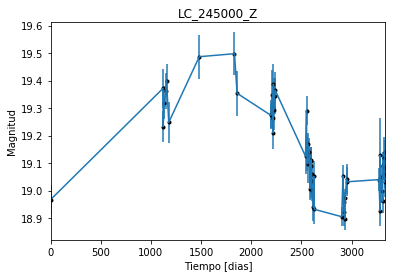

In [2]:
data = np.genfromtxt('LC_245000_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_245000_Z')
plt.savefig("LC_245000_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

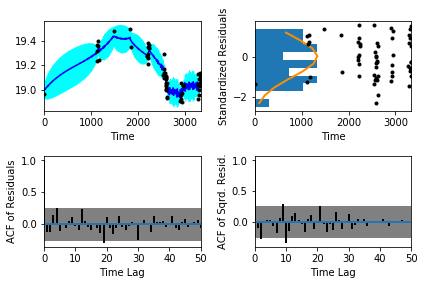

In [5]:
sample.assess_fit()

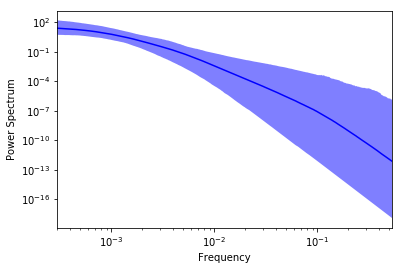

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

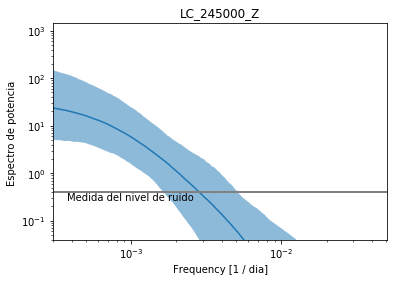

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_245000_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_245000_Z')

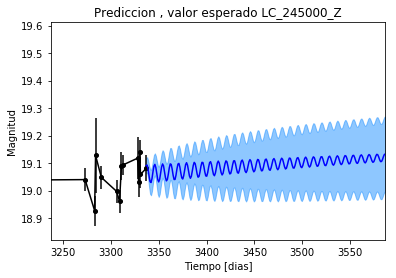

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_245000_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_245000_Z')

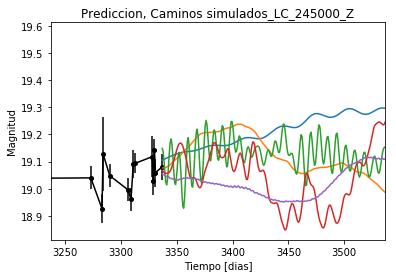

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_245000_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


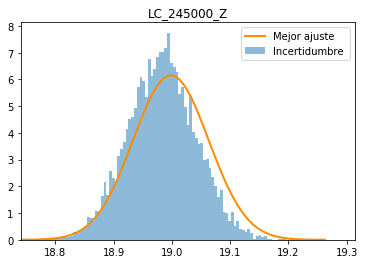

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_245000_Z')
plt.savefig("Mejor_ajuste_LC_245000_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_245000_Z')

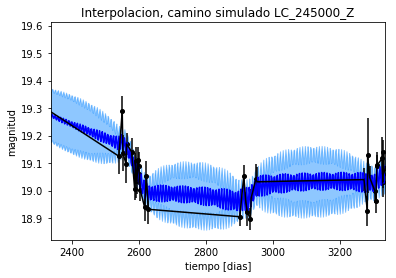

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_245000_Z')

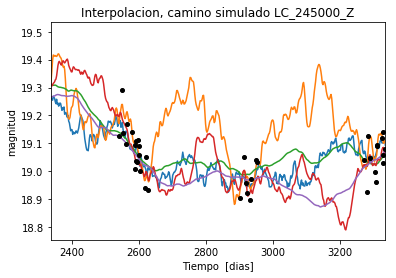

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_245000_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 539.218113779
Median: 0.0125958476424
Standard deviation: 0.21273576391
68% credibility interval: [ 0.00104438  0.21207813]
95% credibility interval: [  3.92900287e-04   8.43220284e-01]
99% credibility interval: [  3.19362331e-04   1.01344645e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 954.925153507
Median: 0.00175704769452
Standard deviation: 0.0832520239738
68% credibility interval: [ 0.00047238  0.02921636]
95% credibility interval: [ 0.00032272  0.2553766 ]
99% credibility interval: [  3.02485545e-04   5.58307851e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 678.188688931
Median: 0.0136105359322
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1440.36243476
Median: 91.6930471254
Standard deviation: 1.5813579234
68% credibility interval: [ 89.96656203  92.85700674]
95% credibility interval: [ 87.49860699  93.43191008]
99% credibility interval: [ 85.49372576  93.84904024]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 411.437474264
Median: 0.707443260674
Standard deviation: 2.13017449748
68% credibility interval: [ 0.06899627  3.81349904]
95% credibility interval: [ 0.01540106  7.1234085 ]
99% credibility interval: [  1.01167922e-02   1.01779393e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 938.915710095
Median: 0.362974630136
Standard deviation: 9.08734173732
68% credibility interval: [ 0.01379918  7.21273976]
95% credibility interval: [  6.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16680.0029031
Median: 1.57768007441e-34
Standard deviation: 1.33383665746e+103
68% credibility interval: [  1.68259896e-83   1.85267473e-11]
95% credibility interval: [  1.60021502e-149   4.74711926e+005]
99% credibility interval: [  5.58621577e-164   3.02797140e+094]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1840.57897432
Median: 19.1776983793
Standard deviation: 0.12260013
68% credibility interval: [ 19.07215695  19.2776876 ]
95% credibility interval: [ 18.92430473  19.41691101]
99% credibility interval: [ 18.7491218   19.54899875]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 459.850683759
Median: 0.00265315673506
Standard deviation: 0.246751820032
68% credibility interval: [ 0.          0.32882521]
95% credibility interval: [ 0.          0.92342433]
99% credibility interval: [ 0.          1.02327674]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 459.850683759
Median: 0.00265315673506
Standard deviation: 0.246751820032
68% credibility interval: [ 0.          0.32882521]
95% credibility interval: [ 0.          0.92342433]
99% credibility interval: [ 0.          1.02327674]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 743.179764629
Median: 0.0
Standard deviation: 0.000372509649446
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1440.36243476
Median: 91.6930471254
Standard deviation: 1.5813579234
68% credibility interval: [ 89.96656203  92.85700674]
95% credibility interval: [ 87.49860699  93.43191008]
99% credibility interval: [ 85.49372576  93.84904024]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2365.01270883
Median: 0.0471249279419
Standard deviation: 0.0710708454298
68% credibility interval: [ 0.0263598  0.096805 ]
95% credibility interval: [ 0.01620827  0.23373321]
99% credibility interval: [ 0.01181169  0.4529474 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1764.05571224
Median: 1.13024094886
Standard deviation: 0.175801413126
68% credibility interval: [ 0.9755103   1.31870347]
95% credibility interval: [ 0.84878916  1.5324577 ]
99% credibility interval: [ 0.78888371  1.69523667]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1325.39930267
Median: 0.00010269712687
Standard deviation: 0.0673630590546
68% credibility interval: [  2.19436353e-06   4.06470146e-03]
95% credibility interval: [  4.56264294e-09   6.66664483e-02]
99% credibility interval: [  1.80489674e-99   4.19385884e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 539.218113779
Median: (-0.0791420448383-2.90691527601j)
Standard deviation: 2.0470359877
68% credibility interval: [-1.33252620+0.j         -0.00656203-0.45539372j]
95% credibility interval: [ -5.29810930e+00+0.j          -2.46866531e-03-0.00405017j]
99% credibility interval: [ -6.36767187e+00+0.j         -2.00661270e-03-0.0030076j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 954.925153507
Median: (-0.0110398562582+0.0177023742563j)
Standard deviation: 1.63625244574
68% credibility interval: [-0.18357182+5.02608732j -0.00296805+0.0160862j ]
95% credibility interval: [-1.60457848+6.24950528j -0.00202774+0.j        ]
99% credibility interval: [ -3.50795169e+00 +6.38766142e+00j  -1.90057273e-03 +1.83734186e-03j]
Poste